In [8]:
# 导入
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
csv_path = 'HousingData.csv'
housing_data = pd.read_csv(csv_path)
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


### 数据处理
`iloc`基于整数位置索引

`fillna`自动将缺失数据填充为0

In [18]:
train_data = housing_data.iloc[:400]
test_data = housing_data.iloc[400:]

features = ['CRIM', 'ZN', 'LSTAT']
train_x = train_data[features].fillna(0).to_numpy() 
train_y = train_data['MEDV'].to_numpy()
test_x = test_data[features].fillna(0).to_numpy()
test_y = test_data['MEDV'].to_numpy()

训练，并查看模型系数和截距

In [19]:
reg_lasso = linear_model.Lasso(alpha=0.5)
reg_lasso.fit(train_x,train_y)
reg_lasso.coef_,reg_lasso.intercept_ 

(array([-0.03911024,  0.03648118, -0.80045983]), 32.61322999502232)

测试，查看误差

Mean squared error: 26.91
Coefficient of determination: 0.05


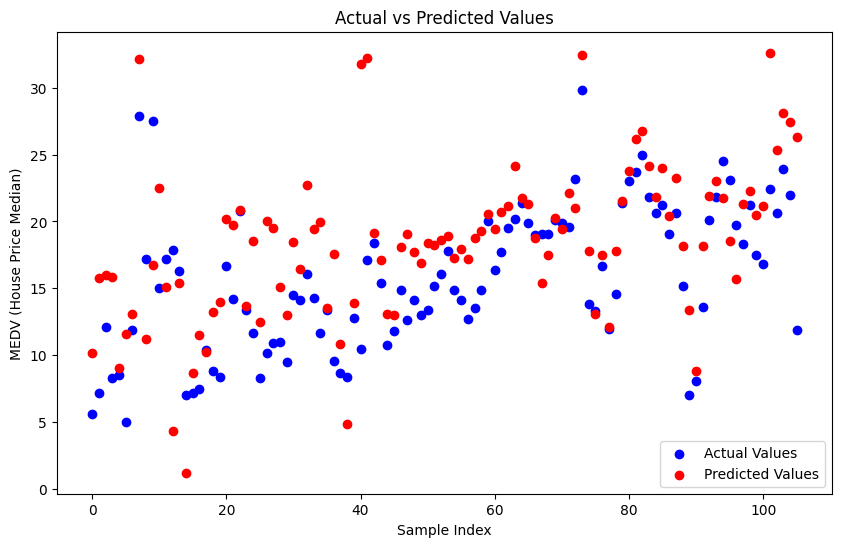

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
test_pred = reg_lasso.predict(test_x)
print("Mean squared error: %.2f" % mean_squared_error(test_y, test_pred))
print("Coefficient of determination: %.2f" % r2_score(test_y, test_pred))

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(range(len(test_y)), test_y, color="blue", label="Actual Values")
plt.scatter(range(len(test_pred)), test_pred, color="red", label="Predicted Values")

plt.title("Actual vs Predicted Values")
plt.xlabel("Sample Index")
plt.ylabel("MEDV (House Price Median)")
plt.legend()
plt.show()

枚举所有选取情况，并选取打印最好的一组

In [22]:
import itertools
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# 获取所有特征名称（不包括目标变量 'MEDV'）
all_features = housing_data.columns.drop('MEDV')
best_mse = float('inf')
best_features = None

# 枚举所有可能的三个特征组合
for feature_combo in itertools.combinations(all_features, 3):
    # 准备训练和测试数据
    train_x = train_data[list(feature_combo)].fillna(0).to_numpy()
    test_x = test_data[list(feature_combo)].fillna(0).to_numpy()
    
    # 训练模型
    reg_lasso = Lasso(alpha=0.5)
    reg_lasso.fit(train_x, train_y)
    
    # 在测试集上进行预测并计算 MSE
    test_pred = reg_lasso.predict(test_x)
    mse = mean_squared_error(test_y, test_pred)
    
    # 输出当前特征组合的 MSE
    print(f"Features: {feature_combo}, MSE: {mse}")
    
    # 更新最佳特征组合
    if mse < best_mse:
        best_mse = mse
        best_features = feature_combo

# 输出最佳特征组合和对应的 MSE
print("\nBest feature combination:", best_features)
print("Best MSE:", best_mse)


Features: ('CRIM', 'ZN', 'INDUS'), MSE: 33.35957893604899
Features: ('CRIM', 'ZN', 'CHAS'), MSE: 43.66746956053995
Features: ('CRIM', 'ZN', 'NOX'), MSE: 43.66746956053995
Features: ('CRIM', 'ZN', 'RM'), MSE: 53.79621523362001
Features: ('CRIM', 'ZN', 'AGE'), MSE: 41.132899349131975
Features: ('CRIM', 'ZN', 'DIS'), MSE: 51.185906597769986
Features: ('CRIM', 'ZN', 'RAD'), MSE: 43.6674939892502
Features: ('CRIM', 'ZN', 'TAX'), MSE: 24.898294550847517
Features: ('CRIM', 'ZN', 'PTRATIO'), MSE: 29.496755076943476
Features: ('CRIM', 'ZN', 'B'), MSE: 31.365783437104565
Features: ('CRIM', 'ZN', 'LSTAT'), MSE: 26.905144699299992
Features: ('CRIM', 'INDUS', 'CHAS'), MSE: 33.944267466217724
Features: ('CRIM', 'INDUS', 'NOX'), MSE: 33.944267466217724
Features: ('CRIM', 'INDUS', 'RM'), MSE: 52.498788034866095
Features: ('CRIM', 'INDUS', 'AGE'), MSE: 33.637440924003904
Features: ('CRIM', 'INDUS', 'DIS'), MSE: 36.769653276421266
Features: ('CRIM', 'INDUS', 'RAD'), MSE: 37.087944091888076
Features: ('C